<a href="https://colab.research.google.com/github/ASWINY/Task-2-Prediction-using-Unsupervised-ML--Predict-the-optimum-number-of-clusters-and-represent-it-vis/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRIP : The Sparks Foundation**

Data Science and Business Analytics Intern

**Author : ASWINY AR**

Task-2 Prediction using Unsupervised ML- Predict the optimum number of clusters and represent it visually using K-Means Clustering.

Dataset-The given dataset has six Columns, one contains the id, four contains the features like sepal length,sepal width, petal length and petal width in centimetres and last column contains the label of iris species. The given dataset is Iris dataset.

Model- K-means clustering is an unsupervised learning algorithm. Basically,it identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid. A cluster refers to a collection of data points aggregated together because of certain similarities.

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

**Importing and Understanding data**

In [2]:
iris_df = pd.read_csv("/content/Iris.csv")
print("The dataset is Imported.")

The dataset is Imported.


In [3]:
iris_df.head() #displaying first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.shape #shape of data

(150, 6)

In [5]:
iris_df.describe() #description 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_df.info() #to get the information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris_df['Species'].unique() #three types of species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
iris_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
iris_df.isnull().sum() #checking null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no missing values in this dataset

Now drop two columns which are Id and Species from our dataset

In [10]:
iris_df.drop(columns=["Id","Species"],axis=1,inplace=True)

In [11]:
wcss=[] # List for saving the values of Within-Cluster sum of squares
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(iris_df) #To train the model and create classifier
    wcss.append(kmeans.inertia_) # To obtain the within cluster sum of square

Text(0.5, 1.0, 'Elbow Method')

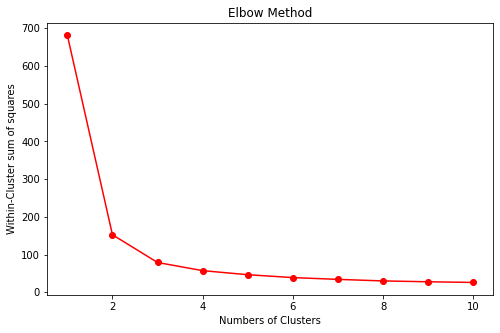

In [12]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss,'ro-')
plt.xlabel("Numbers of Clusters")
plt.ylabel("Within-Cluster sum of squares")
plt.title("Elbow Method")

 The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters =3.

In [14]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(iris_df) # Here we are training, creating Classifier and predicting the Model
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Here 0,1 and 2 are the labels of species that are setosa, versicolor and virginica

In [15]:
kmeans.cluster_centers_ # Centroids of the clusters formed

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Text(0.5, 1.0, 'K-Means Clustering')

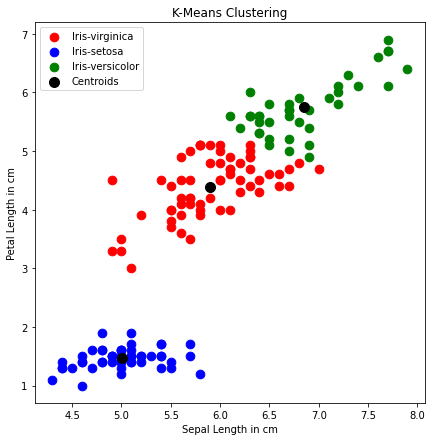

In [16]:
#visualization

plt.figure(figsize=(7,7))
plt.scatter(iris_df.iloc[y_kmeans==0,0],iris_df.iloc[y_kmeans==0,2],s=75,c='red',label='Iris-virginica')
plt.scatter(iris_df.iloc[y_kmeans==1,0],iris_df.iloc[y_kmeans==1,2],s=75,c='blue',label='Iris-setosa')
plt.scatter(iris_df.iloc[y_kmeans==2,0],iris_df.iloc[y_kmeans==2,2],s=75,c='green',label='Iris-versicolor')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2],s=100,c='black',label='Centroids')
plt.legend()
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.title('K-Means Clustering')

**Here, we can see three clusters of iris dataset.**